In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [57]:
np.random.seed(42)
data=np.random.normal(loc=50,scale=10,size=100)
outliers=np.array([10,110,5,120])
data=np.concatenate([data,outliers])

In [59]:
df=pd.DataFrame(data,columns=['Values'])
print(df.head())

      Values
0  54.967142
1  48.617357
2  56.476885
3  65.230299
4  47.658466


In [61]:
df.tail()

,Values
99,47.654129
100,10.000000
101,110.000000
102,5.000000
103,120.000000


***Using Scatter Plot***
**<ins>A scatter plot helps visually identify extreme values.</ins>**

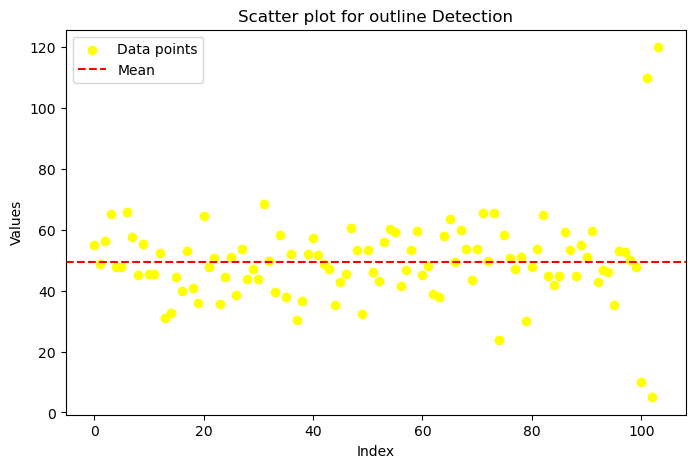

In [64]:
#SCCATER PLOT

plt.figure(figsize=(8,5))
plt.scatter(range(len(df)),df['Values'],color='yellow',label='Data points')
plt.axhline(y=df['Values'].mean(),color='red',linestyle='--',label='Mean')
plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Scatter plot for outline Detection")
plt.legend()
plt.show()


***BOX PLOT***
**<ins>A box plot helps for spotting extreme values using quantiles.</ins>**

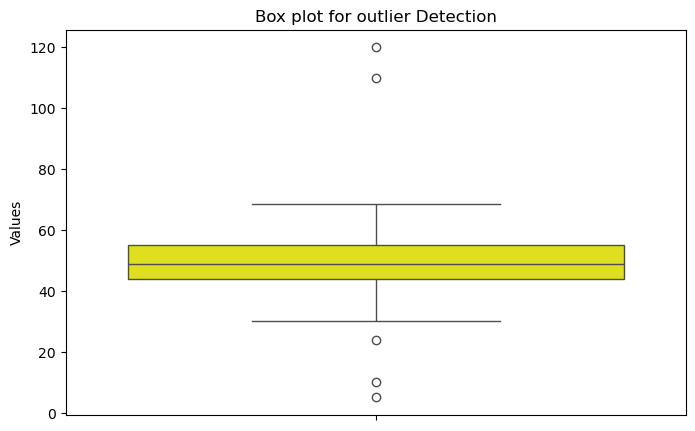

In [67]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df,y='Values',color='yellow')
plt.title("Box plot for outlier Detection")
plt.show()

***Z-Score Method***


The Z-score formula is:


z=x-μ/σ


where


X=Data point


μ =Mean of the dataset


σ=Standard deviation of the dataset


Steps:


1.Compute the Z-score for each data point


2.if Z-score>3 or Z-score<-3,mark it as an outlier

In [70]:
df['Z-score'] = zscore(df['Values'])

# Detect outliers
df['Outlier_Z'] = df['Z-score'].apply(lambda x: 'Outlier' if abs(x) > 3 else 'Normal')

# Print only outliers
print(df[df['Outlier_Z'] == 'Outlier'])

     Values   Z-score Outlier_Z
101   110.0  4.328173   Outlier
102     5.0 -3.175368   Outlier
103   120.0  5.042796   Outlier


**<ins>Interquartile Range (IQR) Method The IQR formula is: <ins>**

IQR=Q3-Q1


Steps:

1.Calculate Q1(25th percentile) and Q3(75th percentile).
                                       

2.Compute IQR=Q3-Q1

3.Define Lowe & upper bounds:


        **Lower Bound=Q1-1.5xIQR**
        **Upper Bound=Q3+1.5xIQR**

4.Any value outside these bounds is an outlier



In [80]:
Q1=df['Values'].quantile(0.25)
Q3=df['Values'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
Upper_bound=Q3+1.5*IQR
df['Outlier_IQR']=df['Values'].apply(lambda x: 'Outlier' if(x<lower_bound or x >Upper_bound) else 'Normal')
print(df[df['Outlier_IQR']=='Outlier'])

         Values   Z-score Outlier_Z Outlier_IQR
74    23.802549 -1.831694    Normal     Outlier
100   10.000000 -2.818056    Normal     Outlier
101  110.000000  4.328173   Outlier     Outlier
102    5.000000 -3.175368   Outlier     Outlier
103  120.000000  5.042796   Outlier     Outlier


***FINAL SUMMARY***

1.Scatter-plot ->Outliers appear far from the main cluster

2.Box Plot -> Outliers are outside the whiskers

3.Z-score ->Values withe Z>3 or Z<-3 are outliers

4.IQR Method -> Values outside[Q1-1.5xIQR,Q3+1.5xIQR are outliers

**Finding Outliers Using the IQR Method with a 5-Number Summary**


The 5-number summary consists of:
 
Minimum (Q0) → The smallest value in the dataset.
 
First Quartile (Q1) → The 25th percentile (lower quartile).
 
Median (Q2) → The 50th percentile (middle value).
 
Third Quartile (Q3) → The 75th percentile (upper quartile).
 
Maximum (Q4) → The largest value in the dataset.
has context menu

The Interquartile Range (IQR) is calculated as:
 
IQR=Q3−Q1
 
Any value outside the range:
 
[Q1−1.5×IQR,Q3+1.5×IQR]  is considered an outlier.

**Let's generate a dataset, compute the 5-number summary, and find the outliers using the IQR**

In [95]:
np.random.seed(42)
data=np.random.normal(loc=50,scale=10,size=100)
outliers=np.array([10,110,5,120])
data=np.concatenate([data,outliers]) 

Q1=np.percentile(data,25)
Q2=np.median(data)
Q3=np.percentile(data,75)
min_value=np.min(data)
max_value=np.max(data)

IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

outliers=data[(data<lower_bound)|(data>upper_bound)]

print(f"5-Number Summary:\nMin: {min_value},Q1:{Q1},Median (Q2):,Q3:{Q3},Max:{max_value}")
print(f"IQR: {IQR}")
print(f"Lower Bound : {lower_bound}, Upper Bound: {upper_bound}")
print(f"Outliers: {outliers}")
    

5-Number Summary:
Min: 5.0,Q1:43.874401021766715,Median (Q2):,Q3:55.00852473036764,Max:120.0
IQR: 11.134123708600924
Lower Bound : 27.17321545886533, Upper Bound: 71.70971029326903
Outliers: [ 23.80254896  10.         110.           5.         120.        ]
